In [76]:
import pandas as pd
import numpy as np

In [77]:
data = [1,2,34,5,8]
pd.DataFrame(data) # Rows and Columns

,0
0,1
1,2
2,34
3,5
4,8


In [78]:
data = { 
    "Name": ["Ram","Sham","Ghansham"],
    "Maths": [19,18,20], # Marks in Maths
    "Chemistry": [14,15,13], # Marks in Chemistry
    "Physics": [19,19.5,18] # MArks in Physics    
}
# Coma{,} is used after each line

In [79]:
df = pd.DataFrame(data)

In [80]:
df

,Name,Maths,Chemistry,Physics
0,Ram,19,14,19.0
1,Sham,18,15,19.5
2,Ghansham,20,13,18.0


In [81]:
type(df) # DataFrame

pandas.core.frame.DataFrame

In [82]:
df["Maths"] # to access a particular element with index

0    19
1    18
2    20
Name: Maths, dtype: int64

In [83]:
type(df["Maths"]) # Series

pandas.core.series.Series

In [84]:
# Let's try out some mathematical operations
df["Physics"] * 10

0    190.0
1    195.0
2    180.0
Name: Physics, dtype: float64

In [85]:
np.sin(df["Physics"])

0    0.149877
1    0.605540
2   -0.750987
Name: Physics, dtype: float64

In [86]:
rng = np.random.default_rng(42)   # default_rng is the recommended constructor for the random number class Generator
s = pd.Series(rng.integers(0,100,10))

__*What is the significance of random. seed(42) ? It's a pop-culture reference! In Douglas Adams's popular 1979 science-fiction novel The Hitchhiker's Guide to the Galaxy, towards the end of the book, the supercomputer Deep Thought reveals that the answer to the great question of “life, the universe and everything” is 42.*__

In [87]:
s 

0     8
1    77
2    65
3    43
4    43
5    85
6     8
7    69
8    20
9     9
dtype: int64

In [88]:
s.sort_values() # The values are arranged in increasing value order

0     8
6     8
9     9
8    20
3    43
4    43
2    65
7    69
1    77
5    85
dtype: int64

In [89]:
# Let' performs some calculations
s * s.sort_values() # Here, the multiplication of the element takes place is done wrt to the index values.
# Hence, we get the square of the terms.

0      64
1    5929
2    4225
3    1849
4    1849
5    7225
6      64
7    4761
8     400
9      81
dtype: int64

In [90]:
# Let's tackel this problem
s * s.sort_values().reset_index(drop=True) # drop is just to get rid of the authentics
# Now, we reset the index of the sort Series and the multiply

0      64
1     616
2     585
3     860
4    1849
5    3655
6     520
7    4761
8    1540
9     765
dtype: int64

In [91]:
df.dtypes # The type of data we are using in the series

Name          object
Maths          int64
Chemistry      int64
Physics      float64
dtype: object

In [92]:
df.columns

Index(['Name', 'Maths', 'Chemistry', 'Physics'], dtype='object')

In [93]:
df.shape # {3}rows and{4} columns

(3, 4)

In [94]:
df.head() # A beautiful Tabular form {from top}

,Name,Maths,Chemistry,Physics
0,Ram,19,14,19.0
1,Sham,18,15,19.5
2,Ghansham,20,13,18.0


In [95]:
df.tail(2) #{from bottom}

,Name,Maths,Chemistry,Physics
1,Sham,18,15,19.5
2,Ghansham,20,13,18.0


In [96]:
df.describe() # Loved it

,Maths,Chemistry,Physics
count,3.0,3.0,3.000000
mean,19.0,14.0,18.833333
std,1.0,1.0,0.763763
min,18.0,13.0,18.000000
25%,18.5,13.5,18.500000
50%,19.0,14.0,19.000000
75%,19.5,14.5,19.250000
max,20.0,15.0,19.500000


# Slicing

In [97]:
df.loc
df.iloc

In [98]:
df

,Name,Maths,Chemistry,Physics
0,Ram,19,14,19.0
1,Sham,18,15,19.5
2,Ghansham,20,13,18.0


In [99]:
df.loc[1] # Here we are able to extract the row 1 # it can not take negative value as NumPy slicing do

Name         Sham
Maths          18
Chemistry      15
Physics      19.5
Name: 1, dtype: object

In [100]:
type(df.loc[1]) # Series 

pandas.core.series.Series

In [101]:
df.iloc[1]

Name         Sham
Maths          18
Chemistry      15
Physics      19.5
Name: 1, dtype: object

In [102]:
# iloc function acts just as nympy slicing function. That ca take negative values
df.iloc[-1]

Name         Ghansham
Maths              20
Chemistry          13
Physics          18.0
Name: 2, dtype: object

In [103]:
df.iloc[1:3] 

,Name,Maths,Chemistry,Physics
1,Sham,18,15,19.5
2,Ghansham,20,13,18.0


# Grouped Operation

In [104]:
# Let' define a new table of cities and countries.
df =pd.DataFrame({
    'Country': ["India","India","USA","UAE","UK","India","USA","Russia","Italy","France","UK"],
    'City': ["Delhi","Mumbai","New York","Dubai","London","YamunaNagar","Washington D.C","Moscow","Venice","Paris",
             "Manchester"],
    'x' : rng.random(11),
    'y' : rng.random(11)})

In [105]:
df # Random x,y values are taken 

,Country,City,x,y
0,India,Delhi,0.975622,0.554585
1,India,Mumbai,0.761140,0.063817
2,USA,New York,0.786064,0.827631
3,UAE,Dubai,0.128114,0.631664
4,UK,London,0.450386,0.758088
5,India,YamunaNagar,0.370798,0.354526
6,USA,Washington D.C,0.926765,0.970698
7,Russia,Moscow,0.643865,0.893121
8,Italy,Venice,0.822762,0.778383
9,France,Paris,0.443414,0.194639


In [106]:
df_by_country = df.groupby('Country')

In [107]:
df_by_country.groups # Index

{'France': [9], 'India': [0, 1, 5], 'Italy': [8], 'Russia': [7], 'UAE': [3], 'UK': [4, 10], 'USA': [2, 6]}

In [108]:
df_by_country.get_group('India') # Specific Entries of India Only

,Country,City,x,y
0,India,Delhi,0.975622,0.554585
1,India,Mumbai,0.761140,0.063817
5,India,YamunaNagar,0.370798,0.354526


In [109]:
df_by_country.get_group('India')["City"] # to access specific column

0          Delhi
1         Mumbai
5    YamunaNagar
Name: City, dtype: object

In [110]:
# New Table
df = pd.DataFrame({
    "Event_id" :[1,1,1,2,2,2,3,3,3],
    "Hit_Time" :[23,34,53,12,44,67,78,34,67],
    "pmt_id" : [2,4,6,9,3,4,8,3,7]
    })

In [111]:
df

,Event_id,Hit_Time,pmt_id
0,1,23,2
1,1,34,4
2,1,53,6
3,2,12,9
4,2,44,3
5,2,67,4
6,3,78,8
7,3,34,3
8,3,67,7


In [112]:
for Event_id,hits in df.groupby("Event_id"):
    print(Event_id)
    print(hits)
    print()

1
   Event_id  Hit_Time  pmt_id
0         1        23       2
1         1        34       4
2         1        53       6

2
   Event_id  Hit_Time  pmt_id
3         2        12       9
4         2        44       3
5         2        67       4

3
   Event_id  Hit_Time  pmt_id
6         3        78       8
7         3        34       3
8         3        67       7



In [113]:
df.groupby("Event_id")['Hit_Time'].min()  # I have taken minimum value for each event_id   #1

Event_id
1    23
2    12
3    34
Name: Hit_Time, dtype: int64

In [114]:
df.groupby("Event_id")['Hit_Time'].max()  # I have taken maximum value for each event_id

Event_id
1    53
2    67
3    78
Name: Hit_Time, dtype: int64

In [115]:
df.groupby("Event_id")['Hit_Time'].sum()  # I have taken summations of each hit_time values in each vevent_id

Event_id
1    110
2    123
3    179
Name: Hit_Time, dtype: int64

In [116]:
# now,let's call it a different way   #2
df.groupby("Event_id")['Hit_Time'].aggregate("max")  # I have taken maximum value for each event_id

Event_id
1    53
2    67
3    78
Name: Hit_Time, dtype: int64

In [117]:
#2 can be used in creating multiple analysis at the same time          # Great
df.groupby("Event_id")['Hit_Time'].aggregate([np.min,np.median,np.mean,np.sum,min,max])  # I have taken minimum value for each event_id

,amin,median,mean,sum,min,max
Event_id,,,,,,
1,23,34,36.666667,110,23,53
2,12,44,41.000000,123,12,67
3,34,67,59.666667,179,34,78


### Transformations

In [118]:
N = 1000
index = pd.date_range("2022-03-13",periods = N,freq = 'D')

In [119]:
index   # array of 1000 days from 2022-03-13 

DatetimeIndex(['2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22',
               ...
               '2024-11-27', '2024-11-28', '2024-11-29', '2024-11-30',
               '2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04',
               '2024-12-05', '2024-12-06'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [120]:
N = 1000
index1 = pd.date_range("2022-03-13",periods = N,freq = 'H')
index1 # 1000 elements with hour difference

DatetimeIndex(['2022-03-13 00:00:00', '2022-03-13 01:00:00',
               '2022-03-13 02:00:00', '2022-03-13 03:00:00',
               '2022-03-13 04:00:00', '2022-03-13 05:00:00',
               '2022-03-13 06:00:00', '2022-03-13 07:00:00',
               '2022-03-13 08:00:00', '2022-03-13 09:00:00',
               ...
               '2022-04-23 06:00:00', '2022-04-23 07:00:00',
               '2022-04-23 08:00:00', '2022-04-23 09:00:00',
               '2022-04-23 10:00:00', '2022-04-23 11:00:00',
               '2022-04-23 12:00:00', '2022-04-23 13:00:00',
               '2022-04-23 14:00:00', '2022-04-23 15:00:00'],
              dtype='datetime64[ns]', length=1000, freq='H')

In [121]:
ts = pd.Series(rng.normal(0.5,2,N),index)
ts   # a random value between {0.5,2} is now associated withh each element of the index

2022-03-13    1.230888
2022-03-14    1.325465
2022-03-15    1.361642
2022-03-16    4.783295
2022-03-17   -0.312830
                ...   
2024-12-02    1.319657
2024-12-03    1.732269
2024-12-04   -3.715907
2024-12-05   -0.228877
2024-12-06   -3.860420
Freq: D, Length: 1000, dtype: float64

----------------------------
Series.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')

In [122]:
ts.rolling(window=100,min_periods = 100).mean()

2022-03-13         NaN
2022-03-14         NaN
2022-03-15         NaN
2022-03-16         NaN
2022-03-17         NaN
                ...   
2024-12-02    0.618548
2024-12-03    0.642299
2024-12-04    0.603463
2024-12-05    0.558531
2024-12-06    0.518321
Freq: D, Length: 1000, dtype: float64

In [123]:
ts = ts.rolling(window=100,min_periods = 100).mean().dropna()
ts  # 99 elements less than original ts

2022-06-20    0.436932
2022-06-21    0.405848
2022-06-22    0.384798
2022-06-23    0.357650
2022-06-24    0.307021
                ...   
2024-12-02    0.618548
2024-12-03    0.642299
2024-12-04    0.603463
2024-12-05    0.558531
2024-12-06    0.518321
Freq: D, Length: 901, dtype: float64

In [125]:
year = ts.groupby(lambda x: x.year).groups
year # grouped by years

{2022: [2022-06-20 00:00:00, 2022-06-21 00:00:00, 2022-06-22 00:00:00, 2022-06-23 00:00:00, 2022-06-24 00:00:00, 2022-06-25 00:00:00, 2022-06-26 00:00:00, 2022-06-27 00:00:00, 2022-06-28 00:00:00, 2022-06-29 00:00:00, 2022-06-30 00:00:00, 2022-07-01 00:00:00, 2022-07-02 00:00:00, 2022-07-03 00:00:00, 2022-07-04 00:00:00, 2022-07-05 00:00:00, 2022-07-06 00:00:00, 2022-07-07 00:00:00, 2022-07-08 00:00:00, 2022-07-09 00:00:00, 2022-07-10 00:00:00, 2022-07-11 00:00:00, 2022-07-12 00:00:00, 2022-07-13 00:00:00, 2022-07-14 00:00:00, 2022-07-15 00:00:00, 2022-07-16 00:00:00, 2022-07-17 00:00:00, 2022-07-18 00:00:00, 2022-07-19 00:00:00, 2022-07-20 00:00:00, 2022-07-21 00:00:00, 2022-07-22 00:00:00, 2022-07-23 00:00:00, 2022-07-24 00:00:00, 2022-07-25 00:00:00, 2022-07-26 00:00:00, 2022-07-27 00:00:00, 2022-07-28 00:00:00, 2022-07-29 00:00:00, 2022-07-30 00:00:00, 2022-07-31 00:00:00, 2022-08-01 00:00:00, 2022-08-02 00:00:00, 2022-08-03 00:00:00, 2022-08-04 00:00:00, 2022-08-05 00:00:00, 2022-

In [126]:
transformed = ts.groupby(lambda x: x.year).transform(lambda x: (x-x.mean())/x.std())

In [127]:
grouped = ts.groupby(lambda x: x.year)
grouped.mean()

2022    0.403198
2023    0.454044
2024    0.417646
dtype: float64

In [128]:
grouped.std()  

2022    0.103040
2023    0.150842
2024    0.163102
dtype: float64

In [129]:
grouped_trans = transformed.groupby(lambda x: x.year)

In [130]:
grouped_trans.mean()

2022    1.431334e-15
2023    8.626281e-16
2024    8.692949e-16
dtype: float64

In [131]:
grouped_trans.std() # by the transformation we get standard deviation equals to 1

2022    1.0
2023    1.0
2024    1.0
dtype: float64

In [132]:
grouped_trans.sum()

2022    2.791101e-13
2023    3.148592e-13
2024    2.964295e-13
dtype: float64

<AxesSubplot:>

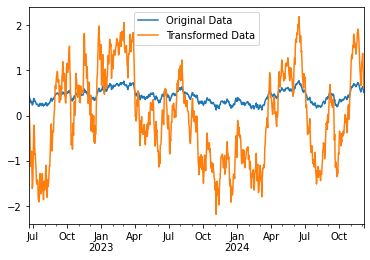

In [139]:
pd.DataFrame({"Original Data":ts,"Transformed Data":transformed}).plot()

In [140]:
# Try ou some plotting
N = 1200
df = pd.DataFrame({
    "Apple": np.cumsum(rng.random(N)),
    "Banana": np.cumsum(rng.random(N)),
    "Grapes": np.cumsum(rng.random(N)),
    "Avagardo": np.cumsum(rng.random(N)),
    "WaterMelon": np.cumsum(rng.random(N))
})
# Taking random number of fruits
#cumsum() function is used when we want to compute the cumulative sum of array elements over a given axis. 

<AxesSubplot:>

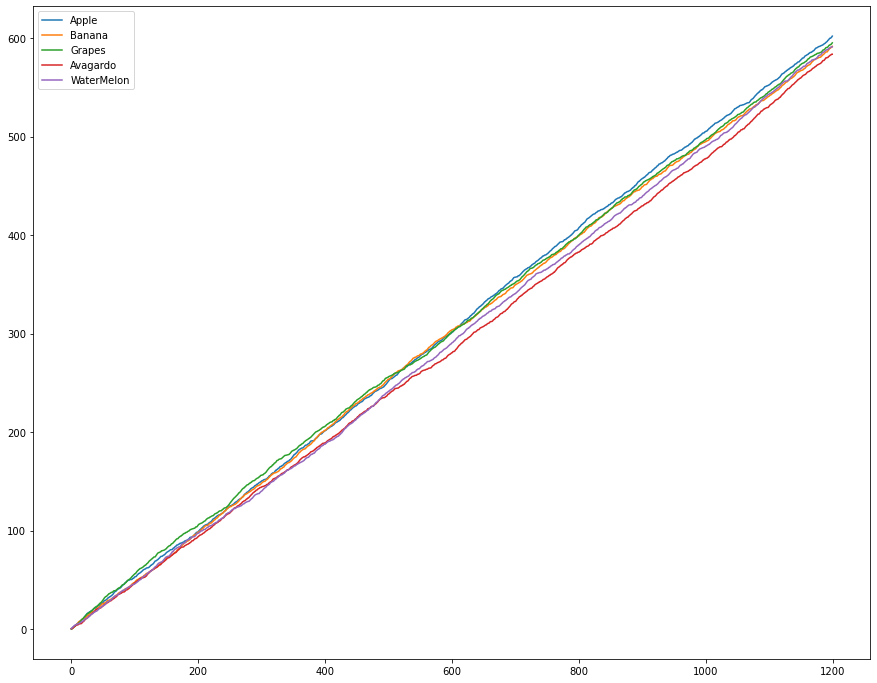

In [151]:
df.plot(figsize =[15,12])

array([[<AxesSubplot:title={'center':'Apple'}>,
        <AxesSubplot:title={'center':'Banana'}>],
       [<AxesSubplot:title={'center':'Grapes'}>,
        <AxesSubplot:title={'center':'Avagardo'}>],
       [<AxesSubplot:title={'center':'WaterMelon'}>, <AxesSubplot:>]],
      dtype=object)

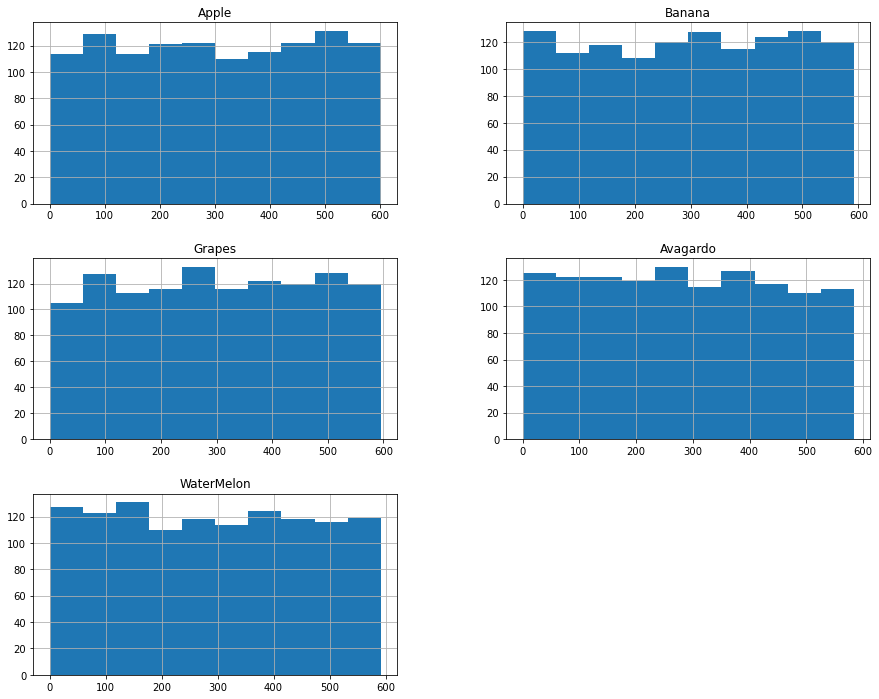

In [150]:
df.hist(figsize =[15, 12])

## Memory Usage of DataFrames

In [157]:
rng = np.random.default_rng(42) # Random-Number-Generator  # 42 is a standard number taken for the following
data = rng.random((10_000_000,6)) # 1000000 rows with 6 coumns
df = pd.DataFrame(data,columns = list("abcdef")) # don have to use {,} in the columns list
df

,a,b,c,d,e,f
0,0.773956,0.438878,0.858598,0.697368,0.094177,0.975622
1,0.761140,0.786064,0.128114,0.450386,0.370798,0.926765
2,0.643865,0.822762,0.443414,0.227239,0.554585,0.063817
3,0.827631,0.631664,0.758088,0.354526,0.970698,0.893121
4,0.778383,0.194639,0.466721,0.043804,0.154289,0.683049
...,...,...,...,...,...,...
9999995,0.299634,0.248661,0.306975,0.255873,0.598481,0.554923
9999996,0.682144,0.095328,0.342927,0.788157,0.567434,0.874902
9999997,0.033573,0.824098,0.843736,0.246748,0.435312,0.581496
9999998,0.008998,0.875801,0.851157,0.836119,0.474845,0.549668


In [159]:
df.info(memory_usage="deep") # signifient memory is used in such calculations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   a       float64
 1   b       float64
 2   c       float64
 3   d       float64
 4   e       float64
 5   f       float64
dtypes: float64(6)
memory usage: 457.8 MB


In [160]:
# clipboard 
df = pd.read_clipboard() # i have defined this table in my Number application and coppied it 

In [161]:
df

,a,b,c
Maths,12,12,34
Physics,23,34,56
Chemistry,44,56,76
English,56,77,43


# SubSampeling applica

In [163]:
# Again, 
data = rng.random((10_000_000,6)) # 1000000 rows with 6 coumns
df = pd.DataFrame(data,columns = list("abcdef")) # don have to use {,} in the columns list
df.head()

,a,b,c,d,e,f
0,0.939485,0.480840,0.711214,0.876777,0.449014,0.573830
1,0.630872,0.981733,0.495770,0.745797,0.486727,0.248995
2,0.292372,0.818959,0.453629,0.110652,0.427098,0.645443
3,0.266059,0.066956,0.977548,0.837343,0.916874,0.354740
4,0.084256,0.707751,0.020230,0.287458,0.120280,0.742823


In [164]:
subsample= df.sample(frac=0.2,random_state=42)
remaining = df.drop(subsample.index)

In [165]:
subsample # randomely mixed up.

,a,b,c,d,e,f
919213,0.356110,0.191756,0.046040,0.856137,0.317563,0.488737
9467153,0.824369,0.252771,0.166195,0.375175,0.802454,0.638200
6585777,0.485268,0.199637,0.695934,0.511827,0.427521,0.254574
3878022,0.816521,0.163611,0.757463,0.629404,0.059651,0.357113
5537116,0.218552,0.588226,0.006963,0.811061,0.209026,0.431728
...,...,...,...,...,...,...
4784587,0.855098,0.586825,0.179835,0.877552,0.958938,0.064311
7566769,0.656653,0.119548,0.513658,0.520586,0.111036,0.099587
1137587,0.077398,0.352894,0.486463,0.625706,0.650859,0.308333
4043855,0.559090,0.674017,0.152587,0.807654,0.229909,0.925296


In [166]:
remaining

,a,b,c,d,e,f
0,0.939485,0.480840,0.711214,0.876777,0.449014,0.573830
1,0.630872,0.981733,0.495770,0.745797,0.486727,0.248995
3,0.266059,0.066956,0.977548,0.837343,0.916874,0.354740
4,0.084256,0.707751,0.020230,0.287458,0.120280,0.742823
5,0.108768,0.567865,0.193116,0.875335,0.044182,0.965933
...,...,...,...,...,...,...
9999995,0.104109,0.283116,0.569718,0.205095,0.595096,0.079059
9999996,0.273411,0.162654,0.173955,0.180698,0.085945,0.824358
9999997,0.368485,0.630131,0.753969,0.687876,0.474939,0.257797
9999998,0.205795,0.673256,0.180128,0.172435,0.745576,0.460111
